In [1]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import datetime as dt

fp = os.path.join('/', 'Users', 'jpcohen', 'EDS-220', 'eds220-2024-sections', 'data', 'ne_110m_admin_0_countries','ne_110m_admin_0_countries.shp')
url = 'https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv'
earthquakes = pd.read_csv(url, parse_dates = ['time'])
cultural_bound = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/share/proj failed


How to code plot

1. overlay world map
2. do pd.plot.scatter to get dot plot for earthquake data
3. choose magnitude as the variable to set color to

possible challenges
 - we won't know until we encounter them
 

In [2]:
cultural_bound.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
earthquakes.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'id', 'place', 'type'], dtype='object')

In [7]:


#earthquakes['year'] = earthquakes['time'].dt.year.dropna()

earthquakes_subset = earthquakes.loc[(earthquakes['mag'] > 6.5) & (earthquakes['time'].dt.year == 2014)].reset_index(drop=True)

points = gpd.points_from_xy(earthquakes_subset.longitude,
                            earthquakes_subset.latitude)

earthquakes_gdf = gpd.GeoDataFrame(earthquakes_subset,
                                  geometry = points,
                                  crs = 'EPSG:4269')

In [6]:
earthquakes_subset.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'id', 'place', 'type',
       'geometry'],
      dtype='object')

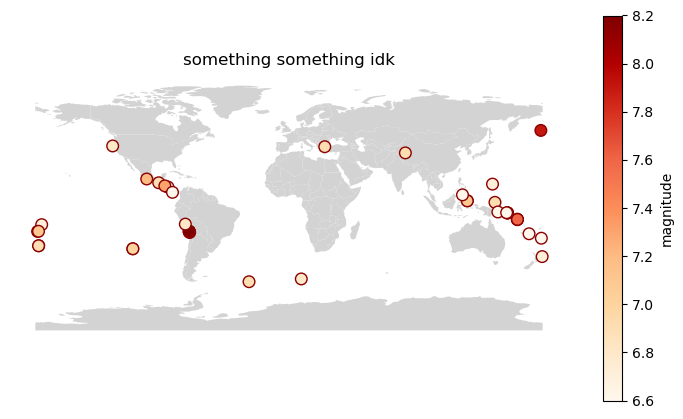

In [38]:
fig, ax = plt.subplots(figsize=(9, 5)) # Update figure size

ax.axis('off')

ax.set_title('something something idk')

cultural_bound.plot(ax = ax,
                   color = 'lightgrey')

earthquakes_gdf.plot(ax = ax,
                    column = 'mag',
                    markersize = 70,
                    cmap = 'OrRd',
                    edgecolor="darkred",
                    legend = True,
                    legend_kwds = {
                      'label': 'magnitude'
                    })

plt.show()